In [5]:
import pandas as pd
import numpy as np


from contingency_space.confusion_matrix import ConfusionMatrix
from contingency_space.contingency_space import ContingencySpace
from contingency_space.imbalance_sensitivity import imbalance_sensitivity
from contingency_space.cm_generator import CMGenerator

In [6]:
def tss(matrix: ConfusionMatrix) -> float:

    t_row = matrix['t']
    f_row = matrix['f']

    tp, fn = t_row[0], t_row[1]
    fp, tn = f_row[0], f_row[1]

    tp_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
    fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

    return tp_rate - fp_rate


In [7]:
df = pd.read_csv('./SF Papers (1).csv')

In [8]:
points = df.drop(['Flare', 'Model', 'HSS', 'Notes', 'Link', 'Unnamed: 8', 'Unnamed: 9'], axis=1)

In [9]:
points = points.dropna()

In [12]:
models_x = points['TNR']
models_x = np.array(models_x)

models_y = points['TPR']
models_y = np.array(models_y)

models_z = points['TSS']
models_z = np.array(models_z)

c:\Users\Colin\Documents\Apps\Python\contingency_space\src\contingency_space\contingency_space.py:257: UserWarning: The following kwargs were not used by contour: 'edgecolor', 'linewidth'
  cs2 = ax.contour(base_x_mesh, base_y_mesh, base_z, 30, vmin=-1, vmax=1, cmap='twilight', edgecolor='black', linewidth=9, linewidths=1.7, linestyles='solid', )


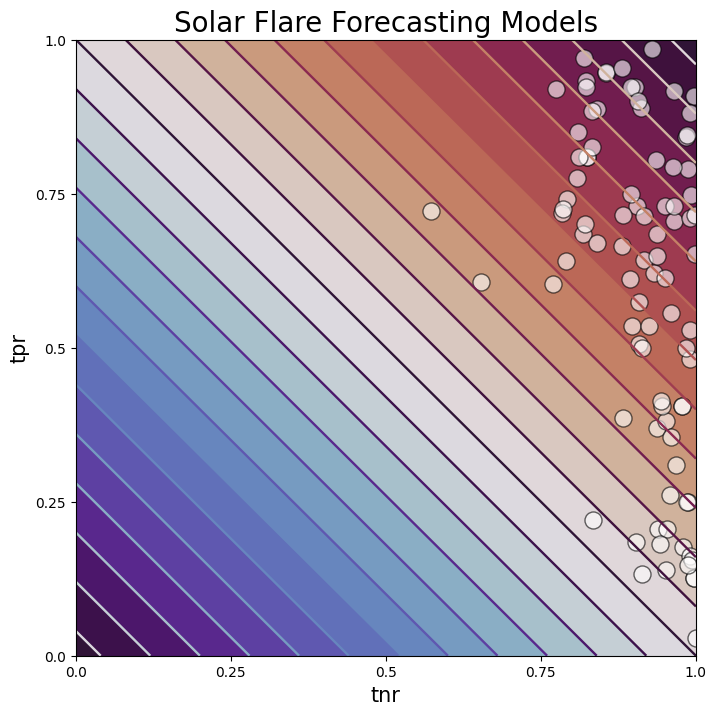

In [13]:
import matplotlib.pyplot as plt

matrices = []
for model_x, model_y in zip(models_x, models_y):
    matrices.append(ConfusionMatrix({'t': [model_y*1000, 1000-model_y*1000], 
                                     'f': [1000-model_x*1000, model_x*1000]}))
    
contingency_space = ContingencySpace(matrices)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_xlabel('tnr', fontsize=15)
ax.set_ylabel('tpr', fontsize=15)


plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='x', nbins=5)
ax.set_title('Solar Flare Forecasting Models', fontsize=20)
ax.set_yticks([0, 250, 500, 750, 1000])
ax.set_yticklabels([0.0, 0.25, 0.5, 0.75, 1.0], fontsize=10)
ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_xticklabels([0.0, 0.25, 0.5, 0.75, 1.0], fontsize=10)

contingency_space.visualize(metric=tss, step_size=100, projection='2d', lines=False, point_size=150.0, ax=ax)
plt.savefig('plot.pdf', format='pdf', bbox_inches='tight')